# SarcGraph Tutorial

All demos are availble on GitHub at https://github.com/Sarc-Graph/sarcgraph/tree/main/tutorials.

To run demos with `jupyter notebook` check [Installation Guide](https://sarc-graph.readthedocs.io/en/latest/installation.html).

SarcGraph incorporates functions to automatically detect and track z-discs and sarcomeres in movies of beating **human induced pluripotent stem cell-derived cardiomyocytes (hiPSC-CMs)**. In addition, SarcGraph includes the tools which enable the recovery of basic sarcomere characteristics and the ability to run further high level analysis.

In this notebook we provide a tutorial on how to use the SarcGraph package using demos and examples. The focus if on the ``SarcGraph`` class in the ``sarcgraph.sg`` module.

## SarcGraph on a Sample Video

In this section we show how to use ``SarcGraph`` to detect and track z-discs and sarcomeres in a sample movie of beating hiPSC-CM. 

To showcase this we use ``samples/sample_0.avi``.

### Import Modules

The first step is to import ``SarcGraph`` class from ``sarcgraph.sg`` module:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sarcgraph.sg import SarcGraph

### SarcGraph Initialization

Next we need to create an instance of ``SarcGraph`` class:

``SarcGraph`` class takes two optional inputs:
- ``output_dir``: the directory to save the results - default: ``'test-run'``
- ``file_type``: whether the sample is a video or an image - default: ``'video'``

In [2]:
sg = SarcGraph(output_dir='../tutorial-results', file_type='video')

### Run Detection

The simplest way to perform sarcomere detection on the video sample is to run ``SarcGraph().sarcomere_detection`` function:

In [3]:
sarcomeres, _ = sg.sarcomere_detection(file_path='../samples/sample_0.avi')

Frame 79: 81 trajectories present.


``SarcGraph().sarcomere_detection`` automatically runs in three steps:

1) Z-disc segmentation: load the video, filter frames, and detect z-discs
2) Z-disc tracking: track detected z-discs
3) Sarcomere detection: detect sarcomeres using tracked z-discs information

And, this is how the output looks like:

**Note**

`sarcomeres.sample(5)` randomly picks 5 samples to display, and running the cell 
multiple times should output different results.

In [4]:
sarcomeres.sample(5)

,frame,sarc_id,x,y,length,width,angle,zdiscs
220,60,2,278.646713,267.714240,11.397091,14.080775,0.000067,"-1,26"
4877,77,60,116.730978,214.462941,12.949554,14.099212,2.805399,"59,79"
2910,30,36,264.642071,218.846934,13.029619,13.280433,0.318365,"31,35"
3830,70,47,113.105042,267.712294,11.226317,13.896309,0.002197,"44,60"
219,59,2,280.124606,270.096786,10.119645,14.683792,0.003224,"-1,26"


By dafault ``save_output=True`` in ``sg.sarcomere_detection()`` and the following information will be saved in ``sg.output_dir``:

- raw video frames (grayscale)
- filtered video frames
- zdisc contours
- segmented zdiscs information
- tracked zdiscs information
- detected sarcomeres information

### Simple Visualization

We briefly show how to use the saved information to visualize z-discs and sarcomeres in one frame of the video.

In [5]:
# load the information
raw_frame = np.load(f"{sg.output_dir}/raw-frames.npy")[0, :, :, 0]
tracked_zdiscs = pd.read_csv(f"{sg.output_dir}/tracked-zdiscs.csv", index_col=[0])

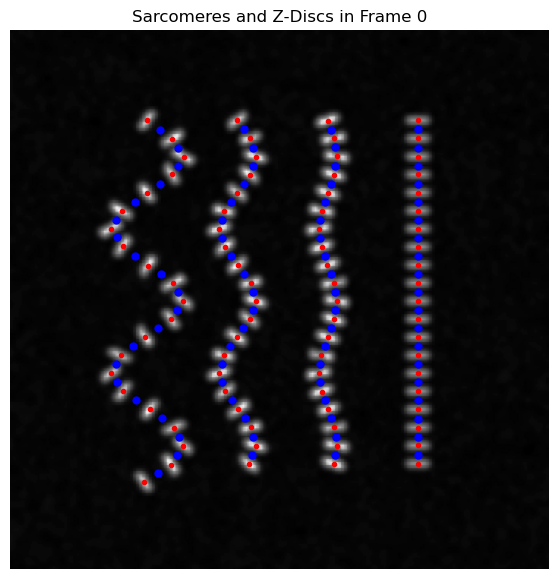

In [6]:
sarcs_frame = sarcomeres[sarcomeres.frame == 0]
zdiscs_frame = tracked_zdiscs[tracked_zdiscs.frame == 0]

plt.figure(figsize=(7,7))
plt.axes().set_title('Sarcomeres and Z-Discs in Frame 0')
plt.axis('off')
plt.imshow(raw_frame, cmap='gray')
plt.plot(zdiscs_frame.y, zdiscs_frame.x, 'r.')
plt.plot(sarcs_frame.y, sarcs_frame.x, 'b.', ms=10)

### Alternative Way to Run SarcGraph

As mentioned in section [Run Detection](###Run-Detection), ``sg.sarcomere_detection`` performs three tasks consecutively. Each task can also be run separately. Note that the results will not be saved since we have set ``save_output=False``. We show how this can be done below:

#### Z-disc Segmentation

Run ``sg.zdisc_segmentation()``.

- Input could be either ``file_path`` or ``raw_frames``.

**Notes**

- ``raw_frames`` must be a 4d numpy array with ``shape=(frames, dim 1, dim 2, channels)``, for example, for a grayscale video with 20 frames and resolution of 400x400 the shape of ``raw_frames`` is ``(20, 400, 400, 1)``
- SarcGraph uses ``scikit`` library to load video/image files and can handle most formats. Yet, we recommend loading your sample video/image into a numpy array and pass the array as the input to ``SarcGraph`` functions, especially if the video/image is saved as a ``TIFF`` file.

In [7]:
zdiscs = sg.zdisc_segmentation(file_path='../samples/sample_0.avi', save_output=False)

#### Z-disc Tracking

Run ``sg.zdisc_tracking()``.

- If the input is either ``file_path`` or ``raw_frames``, this function runs ``sg.zdisc_segmentation`` first and then applies tracking.
- If the input is ``segmented_zdiscs``, ``sg.zdisc_tracking`` only runs tracking.

In [8]:
tracked_zdiscs = sg.zdisc_tracking(segmented_zdiscs=zdiscs, save_output=False)

Frame 79: 81 trajectories present.


Let's check the information stored in tracked_zdiscs:

In [9]:
tracked_zdiscs.sample(10)

,frame,x,y,p1_x,p1_y,p2_x,p2_y,particle,freq
3270,40,279.114063,166.565872,275.000000,160.430515,283.000000,172.113936,24,80
1661,20,184.597237,169.178027,182.000000,163.418879,187.000000,174.990273,39,80
770,9,173.353513,217.482265,174.000000,212.414066,172.000000,222.388170,62,80
968,11,141.369782,146.787244,144.000000,141.701820,139.000000,152.430764,76,80
5919,72,138.771012,76.135783,142.000000,70.795997,135.000000,81.007262,77,80
4286,52,159.956104,278.157040,160.000000,270.661829,160.000000,285.328813,66,80
488,6,232.340605,210.864295,234.000000,204.086232,232.000000,217.365572,1,80
1356,16,121.575798,159.141550,118.000000,152.555463,125.000000,165.887396,42,80
1321,16,279.379684,166.246376,274.901385,160.000000,283.047762,172.000000,24,80
3214,39,100.737593,127.985250,98.000000,122.160055,103.000000,132.979194,51,80


#### Sarcomere Detection Step

Run ``sg.sarcomere_detection()``.

- If the input is either ``file_path`` or ``raw_frames``, this function runs ``sg.zdisc_segmentation`` then ``sg.zdisc_tracking`` before applying sarcomere detection.
- If the input is ``segmented_zdiscs``, this function runs ``sg.zdisc_tracking`` first and then sarcomere detection.
- If the input is ``tracked_zdiscs``, this function only runs sarcomere detection.

In [10]:
sarcs, _ = sg.sarcomere_detection(tracked_zdiscs=tracked_zdiscs)

## SarcGraph on a Sample Image

To analyze a single frame we can follow the steps with a few changes:

- When we are working on single-frame images and not videos, the tracking part cannot be done! Therefore, during [SarcGraph Initialization](###-SarcGraph-Initialization) we should set ``file_type="image"``.
- If rather than running ``SarcGraph().sarcomere_detection``, we need to process the image step by step, we should still run ``SarcGraph().zdiscs_tracking`` although it does not do much.

Import ``SarcGraph`` class first:

In [11]:
from sarcgraph.sg import SarcGraph

Create a new instance of ``SarcGraph`` class and set ``file_type='image'``

In [12]:
sg_img = SarcGraph(output_dir='../tutorial-results-image', file_type='image')

Let's load a sample image to a numpy array and pass it to ``sg_img.sarcomere_detection()`` rather than specifying ``file_path``:

**Note**

We used ``matplotlib.image`` to load the image here.

In [13]:
import matplotlib

img = matplotlib.image.imread('../samples/sample_5.png')

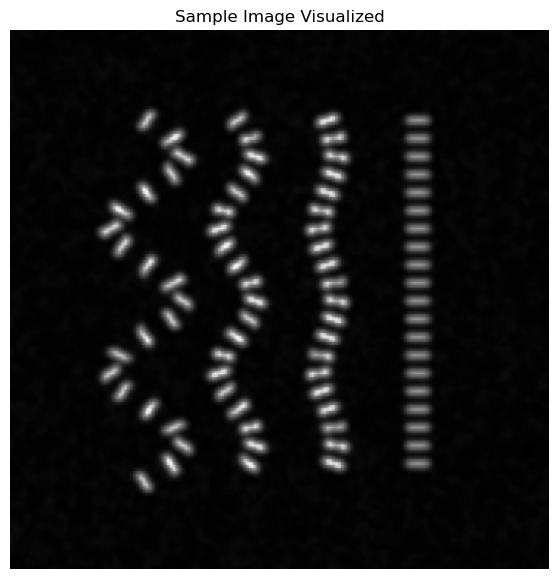

In [14]:
plt.figure(figsize=(7,7)) 
plt.axes().set_title('Sample Image Visualized')
plt.axis('off')
plt.imshow(img, cmap='gray')

Our sample image has the shape ``(368, 368)`` which needs to be reshaped to ``(1, 368, 368, 1)`` - ``[frames, dimension 1, dimension 2, color channels]``.

In [15]:
img = img[None, :, :, None]

Now we can run ``sg_img.sarcomere_detection()``:

In [16]:
sarcs_img, _ = sg_img.sarcomere_detection(raw_frames=img)

Similar to the video sample, we will visualize detected sarcomeres in this image:

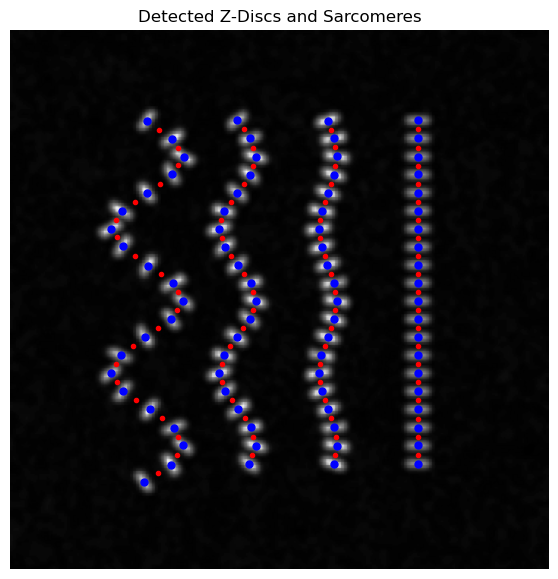

In [17]:
segmented_zdiscs = pd.read_csv(f"{sg_img.output_dir}/segmented-zdiscs.csv", index_col=[0])

plt.figure(figsize=(7,7))
plt.axes().set_title('Detected Z-Discs and Sarcomeres')
plt.axis('off')
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.plot(sarcs_img.y, sarcs_img.x, 'r.')
plt.plot(segmented_zdiscs.y, segmented_zdiscs.x, 'b.', ms=10)